KMeans Algorithm

Step1: Choose k value for ex: k=2

Step2: Initialize centroids randomly

Step3: Calculate Euclidean distance from centroids to each data point and form clusters that are close to centroids

Step4: Update the Cluster Classification for each point

Step5: Find the centroid of each cluster and update centroids

Step:6 Repeat step3


In [40]:
# History
# Name    Date        Description
# -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   
# scl    9-24-201     Add code to calculate SSE 
#                     using the elbow method for k
# scl    9-24-2021    Modify accept different values for k 
# scl    9-25-2021    Add preprocessing for using csv input
#                     tested with LifeExpectancyData.csv
# scl    2-13-2022    Update for assignment 3 using random data.
# -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
def calcDistance(data, p1):
  d = []
  for i in range(len(data)):
    x1 = data.iloc[i].x
    y1 = data.iloc[i].y
    p2 = np.array((x1,y1))
    dx = np.sqrt(np.sum(np.square(p1 - p2)))
    d.append(dx)
  return d

def classifyKMeans(df, kmeans):
  res = []

  # slice and get only the columns with distances
  df_dist = df[df.columns[-kmeans:]]  
  
  # loop through the points and 
  # check the closest distances to classify 
  # which cluster the point belongs to for each iteration
  for row in df_dist.iloc:
    closest = row.min()
    cluster = row.idxmin()
    res.append(cluster)
  df['class'] = res
  return df

# -- scl 
# stop here for now need to fix how to calculate the
# new centriods after the points are classified to a cluster
#  How do you know?
def calcCentroid(df):
  c = df.groupby(['class'])
  c = c.mean().round(2)
  print(c)
  return c

# scl 2-13-2022 
def generateRandomData(num_points, k):
  s = np.random.randint(1,99)
  np.random.seed(s)
  X_features = np.random.randint(1,99, size=(num_points,2))
  y_labels = np.random.randint(1,k+1, size=len(X_features))
  y_labels = pd.Series(y_labels)
  return X_features, y_labels


In [43]:
def main():
  # First: let's prepare the data that we are going to use
  # this is always necessary when do AI and Machine Learning
  # it is an important step as data scientists. And also set
  # the value for k.  Note that eventually use the elbow method 
  # for determining the value of k, but for now lets just set it manually
  k = 3

  # -- scl generate random numbers instead
  d = pd.read_csv('irisdata.csv')
  d = d.fillna(0)

  # create filter
  #filter_year = 2011

  # apply the filter
  #filter_year  = (d['Year'] == filter_year)
  df_life = d

  # Pre processing for Life Expectancy Data Set
  # df_life = pd.read_csv('LifeExpectancyData.csv')

  # Features are :
  col_x = df_life['s_length']
  col_y = df_life['s_width']

  # Observations :
  col_Y = df_life['class']

  # replace X - features and y observations
  X = np.array([col_x, col_y])
  X = X.T
  y = col_Y

  # if you want to use test data just uncomment
  # these lines below.  
  # -- scl
  # -- NUM_POINTS = 200
  # -- s = np.random.randint(1,99)
  # -- np.random.seed(s)
  # -- X = np.random.randint(1,99, size=(NUM_POINTS,2))
  # -- y = np.random.randint(1,k+1, size=len(X))
  # -- y = pd.Series(y)

  # create the main data frame called data
  data = pd.DataFrame(X, columns=['x','y'])
  data['class'] = y.values
  data.head()

  # create the list of centroids base on the value of k
  # to represent the number of clusters to try and
  # detect with this data set.
  centroids = [0 for x in range(k)]
  centroids = calcCentroid(data)

  iter = 4
  i = 1
  for iter in range(iter):
    for i in range (len(centroids)):
      center_point = np.array([(centroids.iloc[i].x, centroids.iloc[i].y)])
      dist = calcDistance(data, center_point)
      data['dist'+str(i)] = dist
      i += 1
    i = 1

    # classify the points
    data = classifyKMeans(data, k)

    # calculate new centriods
    new_centroids = calcCentroid(data)
    centroids = new_centroids

    print('\n- - - - - - - - - - - - - - - - - - - - - - \n')
    print('             ITERATION = ', iter)
    print('\n- - - - - - - - - - - - - - - - - - - - - - \n')

    #print(data)
    print('\n- - - - - - - - - - - - - - - - - - - - - - \n')

  return data

In [44]:
result = main()


                    x     y
class                      
Iris-setosa      5.01  3.42
Iris-versicolor  5.94  2.77
Iris-virginica   6.59  2.97
          x     y  dist0  dist1  dist2
class                                 
dist0  5.01  3.37   0.45   1.21   1.70
dist1  5.81  2.69   1.13   0.39   0.88
dist2  6.80  3.07   1.85   0.95   0.45

- - - - - - - - - - - - - - - - - - - - - - 

             ITERATION =  0

- - - - - - - - - - - - - - - - - - - - - - 


- - - - - - - - - - - - - - - - - - - - - - 

          x     y  dist0  dist1  dist2
class                                 
dist0  5.00  3.40   0.44   1.18   1.88
dist1  5.79  2.70   1.09   0.39   1.11
dist2  6.81  3.07   1.85   1.11   0.43

- - - - - - - - - - - - - - - - - - - - - - 

             ITERATION =  1

- - - - - - - - - - - - - - - - - - - - - - 


- - - - - - - - - - - - - - - - - - - - - - 

          x     y  dist0  dist1  dist2
class                                 
dist0  5.00  3.40   0.44   1.16   1.89
dist1  5.79  2.

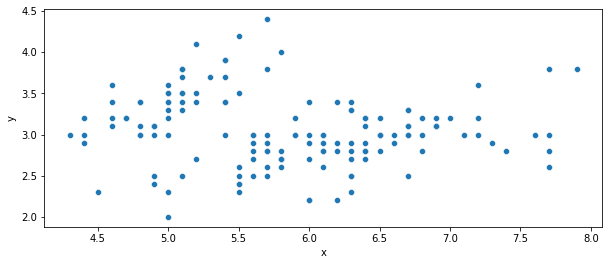

In [45]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=result, x='x', y='y')

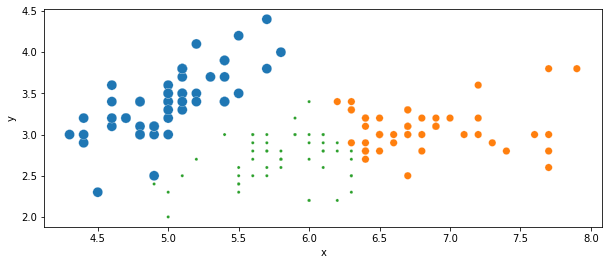

In [46]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=result, x=result.x, y=result.y, size='class', sizes=(10,100), hue='class', legend=False)